In [1]:
import numpy as np
import random
import os
import cv2
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
TEST_DIR = "./Images_Cropped/cropped_testing"
TRAIN_DIR = "./Images_Cropped/cropped_training"
IMG_SIZE = 224
CATEGORIES = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

In [18]:
def create_dataset(data_dir):
    data = []
    for category in CATEGORIES:
        path = os.path.join(data_dir, category)
        class_num = CATEGORIES.index(category)
        for img_name in tqdm(os.listdir(path), desc=f"Processing {category}"):
            img_array = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_COLOR)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, class_num])
    random.shuffle(data)
    return data

In [19]:
print("**********Train Data**********")
training_data = create_dataset(TRAIN_DIR)
print("**********Test Data**********")
testing_data = create_dataset(TEST_DIR)

**********Train Data**********


Processing pituitary_tumor: 100%|██████████| 4135/4135 [00:53<00:00, 77.80it/s] 


**********Test Data**********


Processing pituitary_tumor: 100%|██████████| 370/370 [00:06<00:00, 56.24it/s]


In [20]:
def save_to_pickle(data, directory, filename):
    filepath = os.path.join(directory, filename)
    with open(filepath, "wb") as file:
        pickle.dump(data, file)

In [21]:
save_to_pickle(training_data, "./All_Data_In_One_Pickle/", "Train_data")
save_to_pickle(testing_data, "./All_Data_In_One_Pickle/", "Test_data")

In [7]:
X_train, Y_train = zip(*training_data)
X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test, Y_test = zip(*testing_data)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

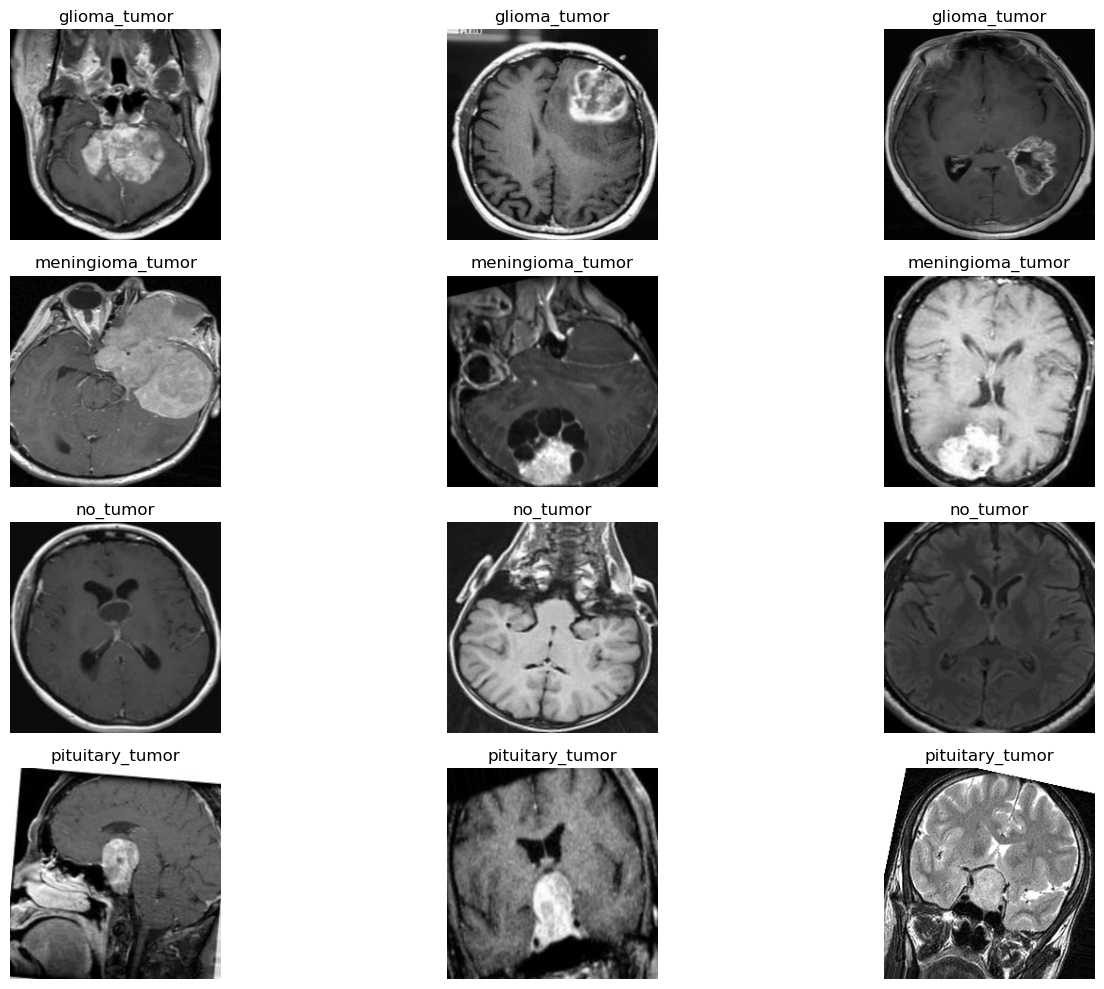

In [8]:
NUM_SAMPLES_PER_CATEGORY = 3


def plot_samples(data):
    fig, axes = plt.subplots(
        len(CATEGORIES), NUM_SAMPLES_PER_CATEGORY, figsize=(15, 10)
    )

    for i, category in enumerate(CATEGORIES):
        category_data = [sample for sample in data if sample[1] == i]
        selected_samples = random.sample(category_data, NUM_SAMPLES_PER_CATEGORY)

        for j, (image, label) in enumerate(selected_samples):
            axes[i, j].imshow(image)
            axes[i, j].set_title(category)
            axes[i, j].axis("off")

    plt.tight_layout()
    plt.show()


plot_samples(testing_data)

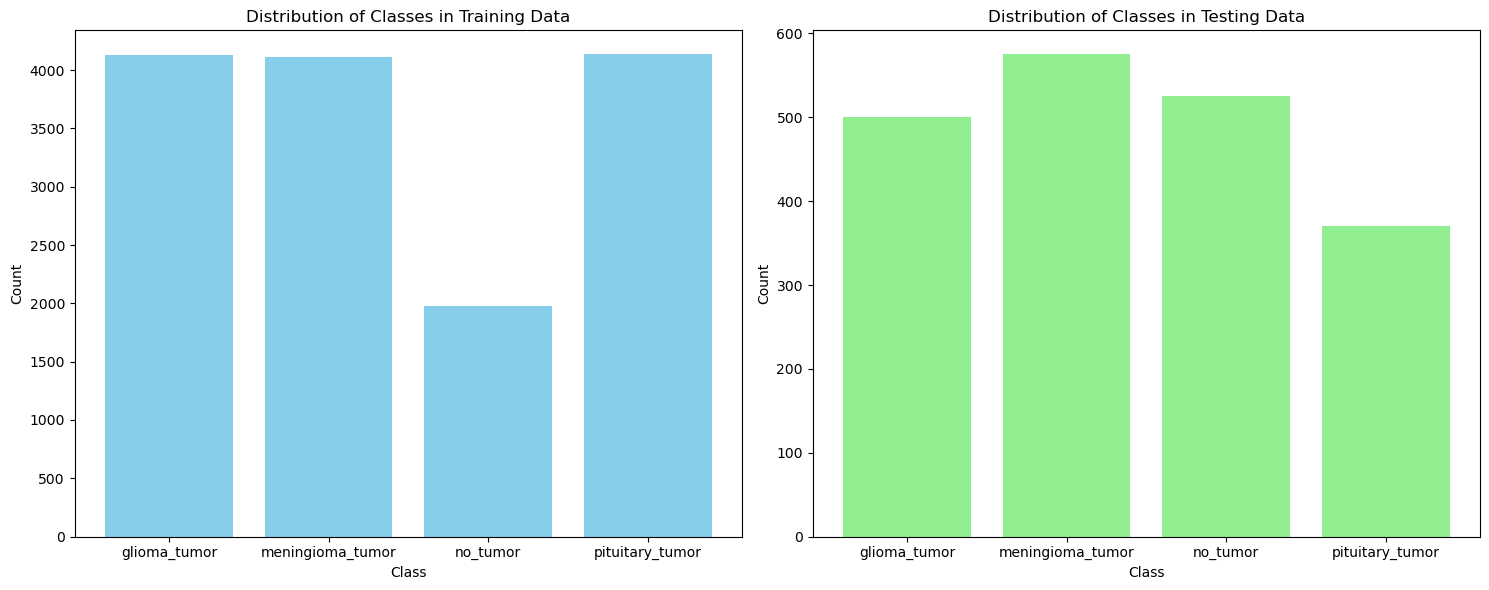

Type of X_train: <class 'numpy.ndarray'>
Shape of X_train: (14347, 224, 224, 3)


In [9]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(
    CATEGORIES, [np.sum(Y_train == i) for i in range(len(CATEGORIES))], color="skyblue"
)
plt.title("Distribution of Classes in Training Data")
plt.xlabel("Class")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
plt.bar(
    CATEGORIES,
    [np.sum(Y_test == i) for i in range(len(CATEGORIES))],
    color="lightgreen",
)
plt.title("Distribution of Classes in Testing Data")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
print("Type of X_train:", type(X_train))
print("Shape of X_train:", X_train.shape)

In [10]:
def load_pickle(filepath):
    with open(filepath, "rb") as file:
        data = pickle.load(file)
    return data

In [11]:
def plot_pie_chart(data, categories):
    class_counts = [
        sum(1 for _, label in data if label == i) for i in range(len(categories))
    ]
    plt.pie(class_counts, labels=categories, autopct="%1.1f%%", startangle=140)
    plt.title("Class Distribution")
    plt.show()

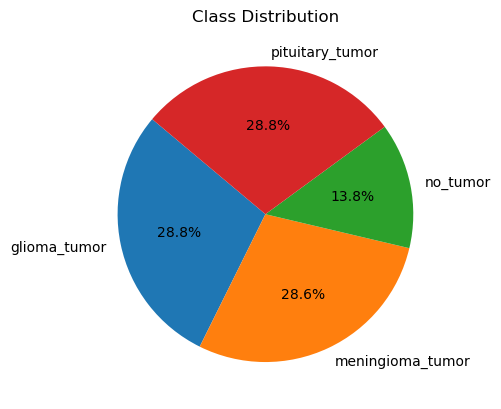

In [12]:
all_training_data = load_pickle("./All_Data_In_One_Pickle/Train_data")


plot_pie_chart(all_training_data, CATEGORIES)

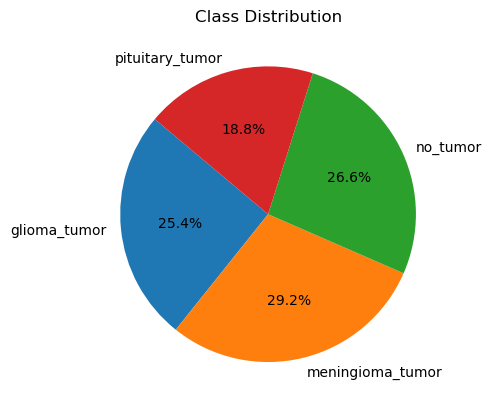

In [13]:
all_testing_data = load_pickle("./All_Data_In_One_Pickle/Test_data")
plot_pie_chart(all_testing_data, CATEGORIES)

In [22]:
with open("./All_Data_In_One_Pickle/Train_data", "rb") as file:
    training_data = pickle.load(file)

print("Length of training data:", len(training_data))

X_train = np.array([i[0] for i in training_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_train = np.array([i[1] for i in training_data])

with open("./Data_In_Pickle/Train_data/X_train.pickle", "wb") as file:
    pickle.dump(X_train, file)
with open("./Data_In_Pickle/Train_data/Y_train.pickle", "wb") as file:
    pickle.dump(Y_train, file)

print("Training data saved")

Length of training data: 14347
Training data saved


In [23]:
with open("./All_Data_In_One_Pickle/Test_data", "rb") as file:
    testing_data = pickle.load(file)

print("Length of Testing Data:", len(testing_data))

X_test = np.array([i[0] for i in testing_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array([i[1] for i in testing_data])

with open("./Data_In_Pickle/Test_data/X_test.pickle", "wb") as file:
    pickle.dump(X_test, file)
with open("./Data_In_Pickle/Test_data/Y_test.pickle", "wb") as file:
    pickle.dump(Y_test, file)

print("Testing data saved")

Length of Testing Data: 1970
Testing data saved
